# Explore here

In [18]:
# Your code here
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score, davies_bouldin_score


In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv")
data.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
data.drop(["HouseAge", "AveRooms","AveBedrms", "Population","AveOccup", "MedHouseVal" ], axis=1, inplace=True)

In [5]:
data.head()

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


In [6]:
data.shape

(20640, 3)

Si bien K viene dado en el proyecto, buscaré con distintos métodos cual K me proponen los algoritmos.

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

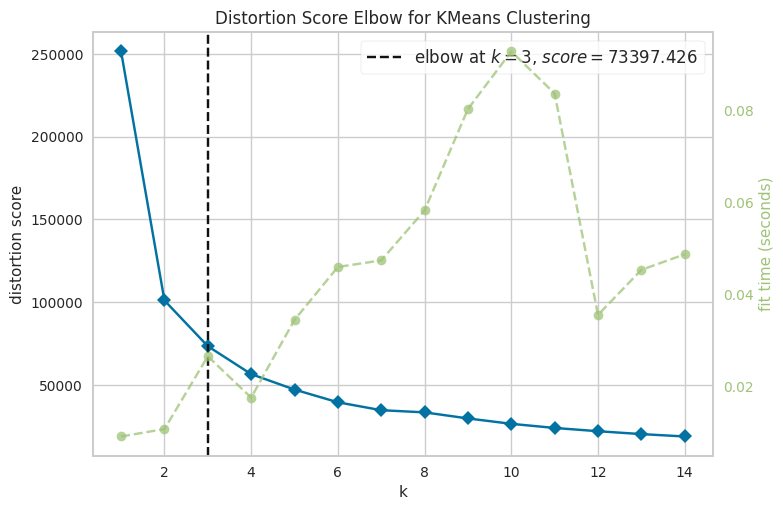

In [20]:
#Método del Codo
elbow = KElbowVisualizer(KMeans(random_state=42), k=(1,15))
elbow.fit(data)
elbow.show();

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

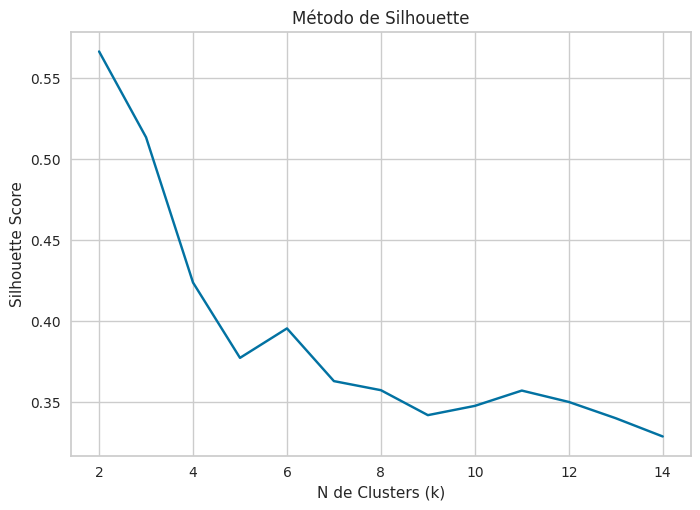

In [23]:
# Silhouette_score

k_values = range(2, 15)

silhouette_scores = []

for k in k_values:
    clusters_labels = KMeans(n_clusters=k, random_state=42).fit_predict(data)
    silhouette_scores.append(silhouette_score(data, clusters_labels))

plt.plot(k_values, silhouette_scores)
plt.xlabel("N de Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Método de Silhouette")
plt.show()


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

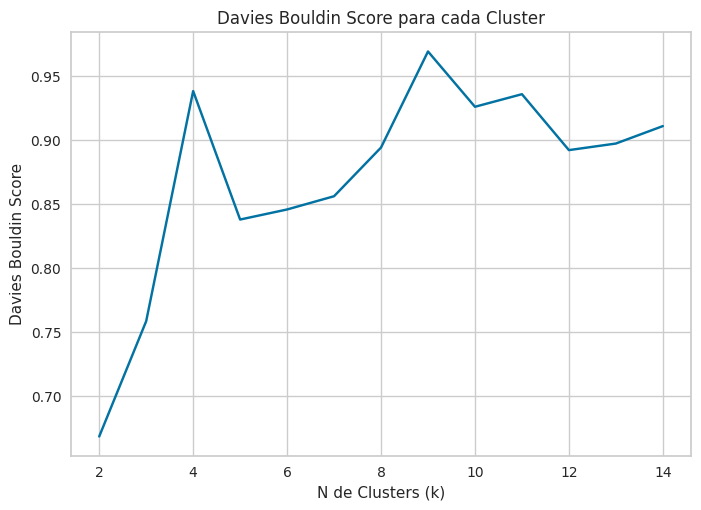

In [24]:
#Davies Boulding Score

k_values = range(2, 15)
db_scores = []

for k in k_values: 
    clusters_labels= KMeans(n_clusters=k, random_state=43).fit_predict(data)
    db_scores.append(davies_bouldin_score(data, clusters_labels))

plt.plot(k_values, db_scores)
plt.xlabel("N de Clusters (k)")
plt.ylabel("Davies Bouldin Score")
plt.title("Davies Bouldin Score para cada Cluster")
plt.show()



Davies Bouldin Score y Silhouette Score nos proponen usar 2 clusters, mientras que el método del codo nos propone usar 3. 

De todos modos, seguiremos las instrucciones del Proyecto y usaremos un K=6

In [7]:
X_train, X_test = train_test_split(data, test_size=0.1, random_state=42)

print(X_train.shape)
X_train.head()

(18576, 3)


,MedInc,Latitude,Longitude
5564,3.8372,33.91,-118.29
16016,8.0069,37.73,-122.46
17131,3.6712,37.46,-122.15
11752,3.1583,38.76,-121.21
2308,4.9292,36.83,-119.75


Modelización

In [8]:
model = KMeans(n_clusters = 6, init= 'k-means++' , random_state = 42)
model.fit(X_train)

KMeans(n_clusters=6, random_state=42)

In [9]:
clusters = dict(zip(np.unique(model.labels_), model.cluster_centers_ ))
clusters

{0: array([   2.78679401,   33.8145388 , -117.81605854]),
 1: array([   2.66648763,   36.09176974, -119.72486184]),
 2: array([   5.53166236,   37.70419856, -121.95867225]),
 3: array([  10.48000041,   34.85186722, -119.18408714]),
 4: array([   5.31207285,   33.85910747, -118.02044098]),
 5: array([   2.83260104,   38.34942085, -121.89288667])}

In [10]:
y_train = model.labels_
X_train["Cluster"] = y_train

In [11]:
X_train.head()

,MedInc,Latitude,Longitude,Cluster
5564,3.8372,33.91,-118.29,0
16016,8.0069,37.73,-122.46,2
17131,3.6712,37.46,-122.15,5
11752,3.1583,38.76,-121.21,5
2308,4.9292,36.83,-119.75,1


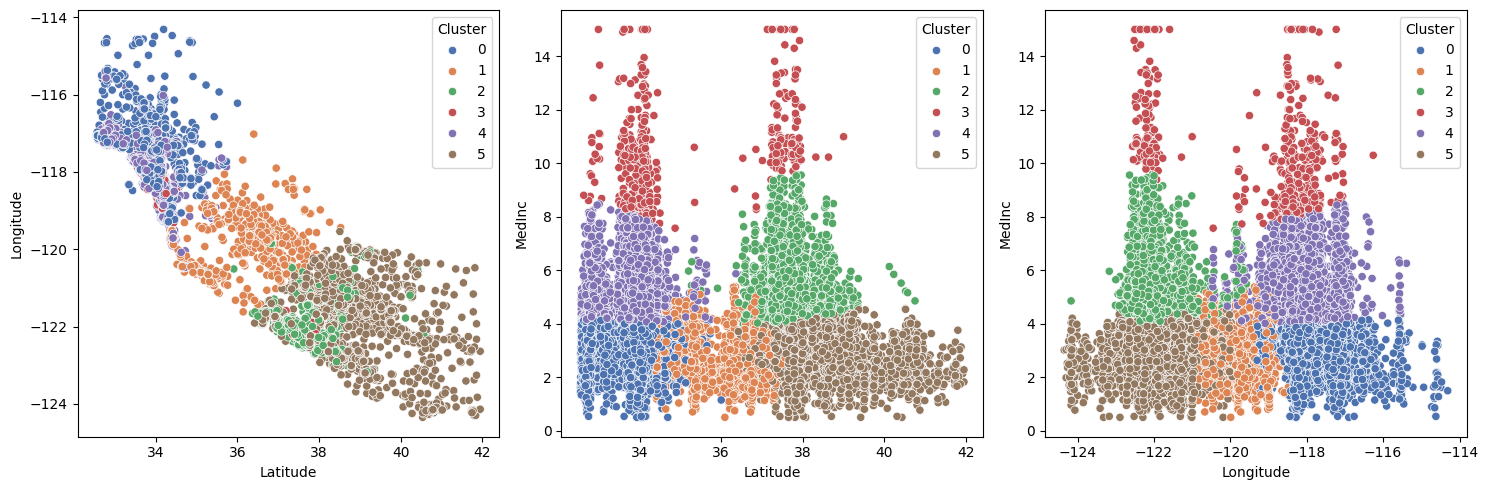

In [15]:
fig, axis = plt.subplots(1, 3, figsize = (15, 5))

sns.scatterplot(ax = axis[0], data = X_train, x = "Latitude", y = "Longitude", hue = "Cluster", palette = "deep")
sns.scatterplot(ax = axis[1], data = X_train, x = "Latitude", y = "MedInc", hue = "Cluster", palette = "deep")
sns.scatterplot(ax = axis[2], data = X_train, x = "Longitude", y = "MedInc", hue = "Cluster", palette = "deep")
plt.tight_layout()

plt.show()